# US Census Income Prediction: Classification & Feature Analysis

## Introduction

 This project utilizes the [1994 US Census Bureau database ](https://archive.ics.uci.edu/dataset/20/census+income)to build a classification model that predicts whether an individual earns above $50,000 annually.

## Project Objectives

The primary goal of this notebook is to develop a machine learning model that includes:

 **Data Preprocessing**: Cleaning and transforming raw census data for model consumption.

  **Model Training & Evaluation**: Implementing and testing classification algorithms to identify the most effective approach.

  **Feature Analysis**: Interpreting the model to understand which demographic features (e.g., age, education, occupation) have the strongest importance in predicting the income.

## Key Results

Among the models evaluated, the *Random Forest Classifier* demonstrated the strongest performance, achieving an accuracy of **88%** on the test set. Furthermore, an analysis of feature importance was conducted to interpret the model's decision-making process,which shows that marial status and age are the most important feature in deciding the income.

# About the data
Age:Their age

Work class:indicates who they are working for

Final weight:indicates how many similar persons are there similar to the person in that row(estimated value using the values in that row)

Education:indicates their highest qualification

Education num:indicates how many years they spent in school

Marital status:indicates whether they are married or not.

Occupation:Their job

Relationship:indicates their family status

Race:inidicates different races

Sex:indicates gender

Capital gain:indicates the money made through any investment like stocks..

capital loss:indicates money lost through any investment like stocks..

Hours per week:indicates weekly working hours

Native country:indicates their orginal nationality

Target column

Salary:indicates whether salary>or =or< 50,000 or not



# Importing necessary libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing

In [64]:
df=pd.read_csv('adult.csv',names=['Age','Work class','Final weight','Education','Education-num','Marital status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours per week','Native country','Salary'])
df

,Age,Work class,Final weight,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [65]:
df.columns

Index(['Age', 'Work class', 'Final weight', 'Education', 'Education-num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours per week', 'Native country',
       'Salary'],
      dtype='object')

In [66]:
df['Native country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

## removing unwanted columns

In [67]:
#since the final weight is not going to impact the result removing that column
df.drop(['Final weight','Race','Relationship','Education-num'],axis=1,inplace=True)

## Removing duplicate columns

In [68]:
#Removing duplicates
df=df.drop_duplicates()

## Removing null values

In [69]:
df.isna().sum()
#zero Nan values in all the columns

,0
Age,0
Work class,0
Education,0
Marital status,0
Occupation,0
Sex,0
Capital-gain,0
Capital-loss,0
Hours per week,0
Native country,0


## Removing unwanted spaces

In [70]:
df['Work class']=df['Work class'].str.strip()
df['Education']=df['Education'].str.strip()
df['Marital status']=df['Marital status'].str.strip()
df['Occupation']=df['Occupation'].str.strip()
df['Native country']=df['Native country'].str.strip()
df['Sex']=df['Sex'].str.strip()
df['Salary']=df['Salary'].str.strip()

---

## Check for any unknown values other than data and fixing it

In [71]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [72]:
df['Work class'].unique()
#in work class there is ? which is an unknown value so replacing it

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [73]:
df['Work class'].value_counts()

,count
Work class,
Private,18155
Self-emp-not-inc,2459
Local-gov,1994
?,1548
State-gov,1251
Self-emp-inc,1091
Federal-gov,926
Without-pay,14
Never-worked,7


In [74]:
df['Work class']=np.where(df['Work class']==' ?',df['Work class'].mode()[0],df['Work class'])
#changing the ? with mode of work class

In [75]:
df['Education'].unique()
#there is no unknown data in education column

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [76]:
df['Marital status'].unique()
#there is no unknown data in education column

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [77]:
df['Occupation'].unique()
#there exist an unknown data ? in the column so remove or replace it

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [78]:
df['Occupation'].value_counts()

,count
Occupation,
Prof-specialty,3774
Exec-managerial,3613
Craft-repair,3099
Sales,3070
Adm-clerical,2993
Other-service,2736
Machine-op-inspct,1566
?,1555
Transport-moving,1393


In [79]:
df['Occupation']=df['Occupation'].replace(' ?',df['Occupation'].mode()[0])
#replaced the ? with the mode of the column

In [80]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [81]:
df['Capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [82]:
df['Capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [83]:
df['Native country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [84]:
df['Native country'] = df['Native country'].replace({
    ' South': 'South Korea',
    ' Hong': 'Hong Kong',
    ' Columbia': 'Colombia',
    ' Trinadad&Tobago': 'Trinidad & Tobago',
    ' ?': df['Native country'].mode()[0]
})

In [85]:
df['Hours per week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [86]:
df['Salary'].unique()
#there is no unknown value in salary column

array(['<=50K', '>50K'], dtype=object)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27445 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             27445 non-null  int64 
 1   Work class      27445 non-null  object
 2   Education       27445 non-null  object
 3   Marital status  27445 non-null  object
 4   Occupation      27445 non-null  object
 5   Sex             27445 non-null  object
 6   Capital-gain    27445 non-null  int64 
 7   Capital-loss    27445 non-null  int64 
 8   Hours per week  27445 non-null  int64 
 9   Native country  27445 non-null  object
 10  Salary          27445 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.5+ MB


In [88]:
df.describe()
#using the details from the info and describe its clear that there is no ? or unknown values in left columns

,Age,Capital-gain,Capital-loss,Hours per week
count,27445.000000,27445.000000,27445.000000,27445.000000
mean,39.801166,1269.858007,102.887848,40.805611
std,13.668097,8003.058325,435.635682,12.986836
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Handling outliers

<Axes: ylabel='Age'>

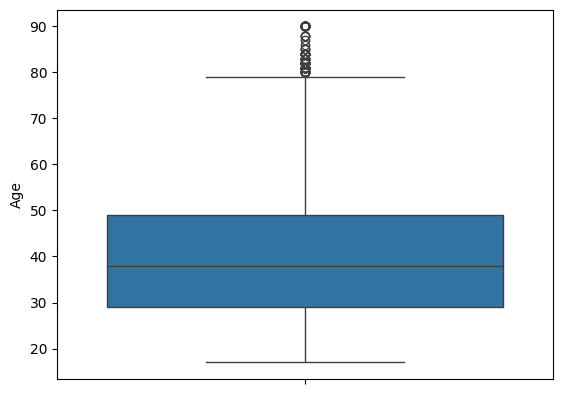

In [89]:
sns.boxplot(df['Age'])

In [90]:
#calculating iqr
q1,q3=np.percentile(df['Age'],[25,75])
iqr=q3-q1
iqr

#calculating upper limit and lower limit
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

#since there is only outliers above the upper limit fixing outliers using caping
df['Age']=np.where(df['Age']>upper_limit,upper_limit,df['Age'])

<Axes: ylabel='Capital-gain'>

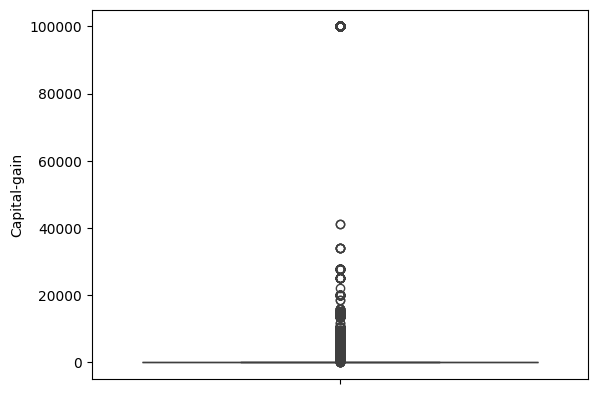

In [91]:
sns.boxplot(df['Capital-gain'])

<Axes: ylabel='Capital-loss'>

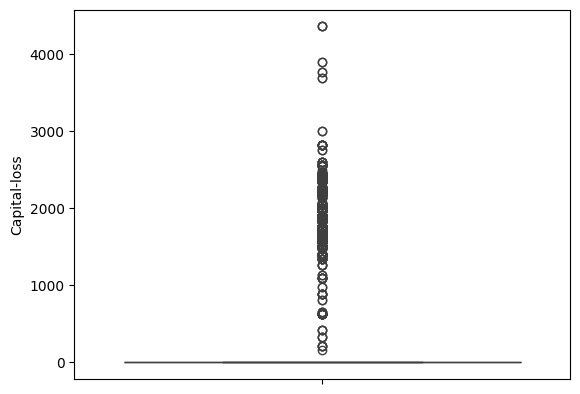

In [92]:
sns.boxplot(df['Capital-loss'])

<Axes: ylabel='Hours per week'>

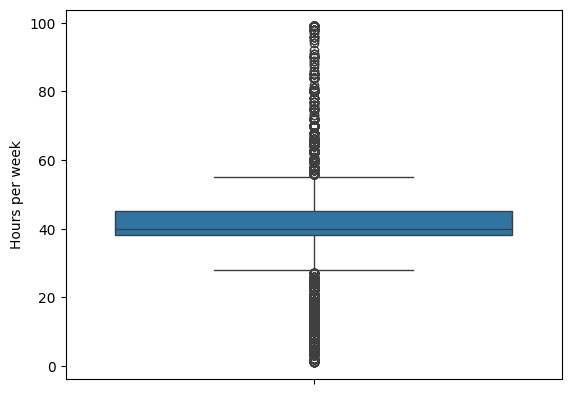

In [93]:
sns.boxplot(df['Hours per week'])

---

## Removing skewness

In [94]:
numeric_column=df.select_dtypes(include=np.number)
skewness=numeric_column.skew().sort_values(ascending=False)
skewness
#here capital_gain and capital_lose is skewed

,0
Capital-gain,11.003415
Capital-loss,4.181215
Age,0.473731
Hours per week,0.225917


In [95]:
#since both columns have zero fixing using square root transformation
df['Capital-gain']=df['Capital-gain']**0.5
df['Capital-loss']=df['Capital-loss']**0.5

---

## Encoding the data

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27445 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27445 non-null  float64
 1   Work class      27445 non-null  object 
 2   Education       27445 non-null  object 
 3   Marital status  27445 non-null  object 
 4   Occupation      27445 non-null  object 
 5   Sex             27445 non-null  object 
 6   Capital-gain    27445 non-null  float64
 7   Capital-loss    27445 non-null  float64
 8   Hours per week  27445 non-null  int64  
 9   Native country  27445 non-null  object 
 10  Salary          27445 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.5+ MB


In [97]:
encoders_value={}#to keep the encoder value
categorical_features = ['Work class',
                        'Education','Marital status',
                        'Occupation','Native country','Salary']

for x in categorical_features:
  le=LabelEncoder()
  df[x]=le.fit_transform(df[x])
  encoders_value[x]=le

In [98]:
#One hot encoding
df=pd.get_dummies(df,columns=['Sex'],dtype=int)

In [99]:
df

,Age,Work class,Education,Marital status,Occupation,Capital-gain,Capital-loss,Hours per week,Native country,Salary,Sex_Female,Sex_Male
0,39.0,7,9,4,1,46.626173,0.0,40,39,0,0,1
1,50.0,6,9,2,4,0.000000,0.0,13,39,0,0,1
2,38.0,4,11,0,6,0.000000,0.0,40,39,0,0,1
3,53.0,4,1,2,6,0.000000,0.0,40,39,0,0,1
4,28.0,4,9,2,10,0.000000,0.0,40,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53.0,4,12,2,4,0.000000,0.0,40,39,1,0,1
32555,22.0,4,15,4,11,0.000000,0.0,40,39,0,0,1
32556,27.0,4,7,2,13,0.000000,0.0,38,39,0,1,0
32558,58.0,4,11,6,1,0.000000,0.0,40,39,0,1,0


---

## Checking correlation

<Axes: >

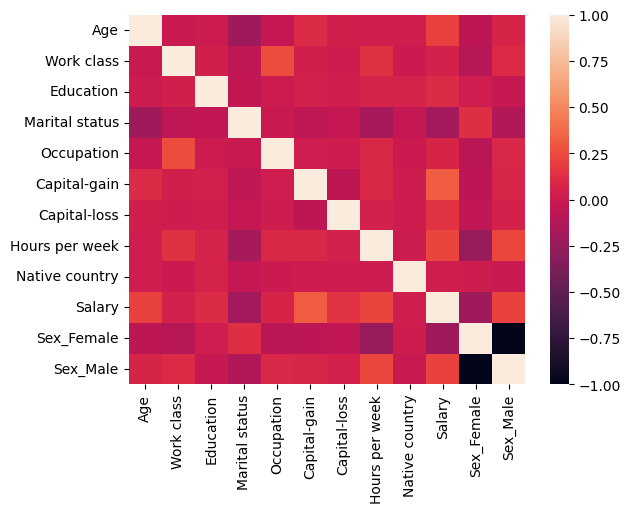

In [100]:
sns.heatmap(df.corr())

There is no correlated features

## Splitting into input and output

In [101]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

---

## Checking for imbalance

In [102]:
y.value_counts()

,count
Salary,
0,20300
1,7145


since the value counts indicate that the data is imbalanced balancing using SMOTE

In [103]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
x,y=os.fit_resample(x,y)


## Scaling

In [104]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

---

## Splitting into training and test data

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=2)

# Model Creation

## Logistic Regression

In [106]:
lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
model={}
model['LogisticRegression']=y_lr_pred

## KNeighbours Classifier

In [107]:
knn=KNeighborsClassifier(p=2)
knn.fit(x_train,y_train)
y_knn_pred=knn.predict(x_test)
model['KNeighborsClassifier']=y_knn_pred

## DecisionTree classifier

In [108]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_dt_pred=dt.predict(x_test)
model['DecisionTreeClassifier']=y_dt_pred

## RandomForest Classifier

In [109]:
rf_classifier=RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train,y_train)
y_rf_pred=rf_classifier.predict(x_test)
model['RandomForestClassifier']=y_rf_pred

## Support vector Classifier

In [110]:
sv=SVC(kernel='linear',C=1)
sv.fit(x_train,y_train)
y_sv_pred=sv.predict(x_test)
model['Support Vector Classifier']=y_sv_pred

## Naive Bayes classifier

In [111]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_nb_pred=gb.predict(x_test)
model['Nave bayes']=y_nb_pred

## Adaboost classifier

In [112]:
ac=AdaBoostClassifier(random_state=1)
ac.fit(x_train,y_train)
y_ab_pred=ac.predict(x_test)
model['Adaboost classifier']=y_ab_pred

#Model Evaluation

In [113]:
for y_pred in model:
    print(y_pred,'\n',classification_report(y_test,model[y_pred]))

LogisticRegression 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6096
           1       0.75      0.75      0.75      6084

    accuracy                           0.75     12180
   macro avg       0.75      0.75      0.75     12180
weighted avg       0.75      0.75      0.75     12180

KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      6096
           1       0.82      0.88      0.85      6084

    accuracy                           0.84     12180
   macro avg       0.84      0.84      0.84     12180
weighted avg       0.84      0.84      0.84     12180

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      6096
           1       0.83      0.83      0.83      6084

    accuracy                           0.83     12180
   macro avg       0.83      0.83      0.83     12180
weigh

# Hyperparameter Tuning

In [114]:
params={'n_estimators': [100, 200, 300, 500],'max_depth': [10, 20, 30],}
clf=GridSearchCV(rf_classifier,params,cv=5,scoring='accuracy',n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 30, 'n_estimators': 500}


In [115]:
rf_classifier=RandomForestClassifier(random_state=1,max_depth=30,n_estimators=500)
rf_classifier.fit(x_train,y_train)
y_rf_pred=rf_classifier.predict(x_test)
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      6096
           1       0.86      0.90      0.88      6084

    accuracy                           0.88     12180
   macro avg       0.88      0.88      0.88     12180
weighted avg       0.88      0.88      0.88     12180



# Feature importance

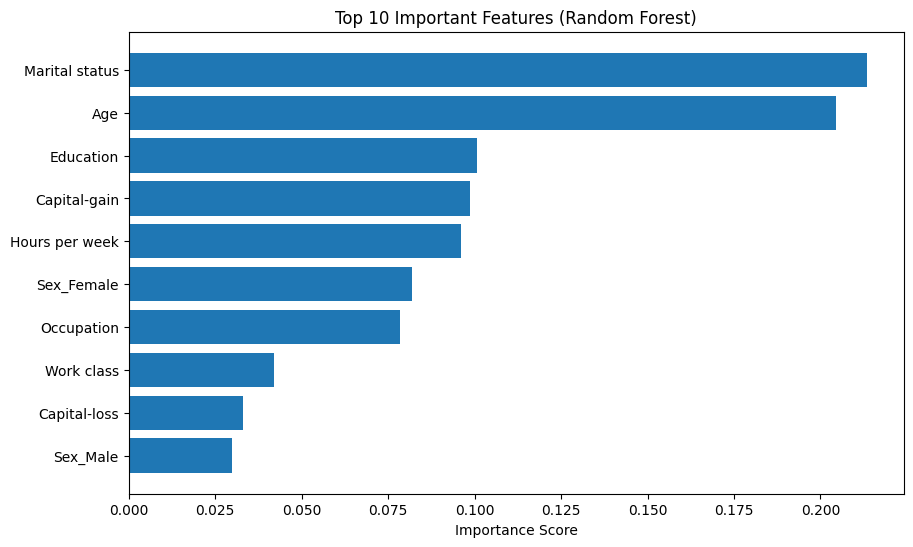

In [116]:
importances = rf_classifier.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

#the below graph indicates which feature is given the maximum score while creating the model in
#random forest algorithm ,here it is maritial status
#it means ms is the most important feature which can seperate people income <or >50000
#best fit attribute

#Model Saving

In [117]:
joblib.dump(rf_classifier, 'model.pkl')
joblib.dump(encoders_value, 'encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Final results and Conclusion

## Model Performance Summary

To identify the most effective algorithm for income prediction, seven different classification models were trained and evaluated,out of them Random Forest performed the best.

## Feature Importance

Understanding why the model makes a prediction is as important as the prediction itself. Analysis of the Random Forest feature importance revealed:

 **Marital Status** : This was the most significant predictor. Married individuals(specifically "Married-civ-spouse") showed higher income brackets, likely indicating dual-income households or greater financial stability associated with this demographic.

 **Age** : The second most critical feature. Income tends to increase with experience and career progression, making older individuals more likely to earn >$50k up to a certain retirement age.
